# IFT712 - Projet de session

* 6 méthodes de classification 
* Analyse des données
* Recherche d'hyperparamètres
* Visualisation des résultats

# Configuration

In [1]:
# Vérifier si les bibliothèques nécessaires sont déjà installées
try:
    import pandas as pd
    import numpy as np
    import sklearn
    import matplotlib
    import seaborn
    import warnings
    import plotly.express as px

    print("Les bibliothèques sont déjà installées.")
except ImportError:
    # Installer les bibliothèques manquantes
    !pip install pandas numpy scikit-learn matplotlib seaborn plotly

    # Redémarrer le noyau du notebook après l'installation (optionnel)
    # Pour effectuer le redémarrage automatique, décommentez la ligne suivante
    # import IPython
    # IPython.Application.instance().kernel.do_shutdown(True)


Les bibliothèques sont déjà installées.


In [2]:
'''
    Imporation des bibliothèques python générales
'''
import numpy as np
import itertools
from sklearn.datasets import make_classification
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

'''
    Imporation des bibliothèques spécifiques au projet
'''
import utils
from data_management import DataManager
from data_processing import DataProcessor
from data_visualization import Visualization


"""
    Préludes
"""
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
matplotlib.style.use('ggplot')

# Données du projet : la classification linéaire ...

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [3]:
# Importer les données, visualiser le dataframe, expliquer le contenu des variables etc.
# Voir class DataManager():
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Définition des variables : 

* **age** = Âge de l'individu

* **sex** = Sexe de l'individu 
    * 1 = Homme
    * 0 = Femme

* **cp** = Type de douleur thoracique

    * 1 : angine typique
    * 2 : angine atypique
    * 3 : douleur non angineuse
    * 4 : asymptomatique

* **trtbps** =  tension artérielle au repos (en mm Hg)

* **chol** = cholestérol en mg/dl récupéré via le capteur IMC

* **fbs** = (glycémie à jeun > 120 mg/dl) 
    * 1 = vrai
    * 0 = faux

* **restecg** = résultats électrocardiographiques au repos
    * Valeur 0 : normale
    * Valeur 1 : présentant une anomalie de l'onde ST-T (inversions de l'onde T et/ou élévation ou dépression ST > 0,05 mV)
    * Valeur 2 : montrant une hypertrophie ventriculaire gauche probable ou certaine selon les critères d'Estes

* **thalachh** = fréquence cardiaque maximale atteinte

* **exng** = angine induite par l'exercice 
    * 1 = oui ; 
    * 0 = non

* **oldpic** = Pic précédent (ST, valeur numérique mesurée en dépression)

* **clp** = pente du segment ST de l'exercice de pointe 
    * 2 = ascendant, 
    * 1 = plat, 
    * 0 = descendant

* **caa** = nombre de vaisseaux sanguins majeurs (0-3)

* **thal** = Taux de Thal

* **output**  
    * 0 : pas de risque de maladie cardiaque (normal)
    * 1 : présence risque de maladie cardiaque


#### Observer les types de chaque variable

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### Vérifier si le jeu de données contient des valeurs manquantes (NaN)

In [ ]:
# Vérification des NULL dans les données
df.isnull().sum()

S'il en contenait, utiliser la fonction handle_missing_values() de la classe DataProcessor

#### Prendre connaissance de quelques statistic sur les données

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Analyse exploratoire des données

### Matrice de corrélation 
Il est essentiel de éliminer les variables corrélées afin d'optimiser votre modèle. La matrice de corrélation permet de détecter les corrélations entre les variable.
On utilise la fonction *.corr()* de la bibliothèque *pandas* puis on visualise la matrice de corrélation avec *seaborn.heatmap*.

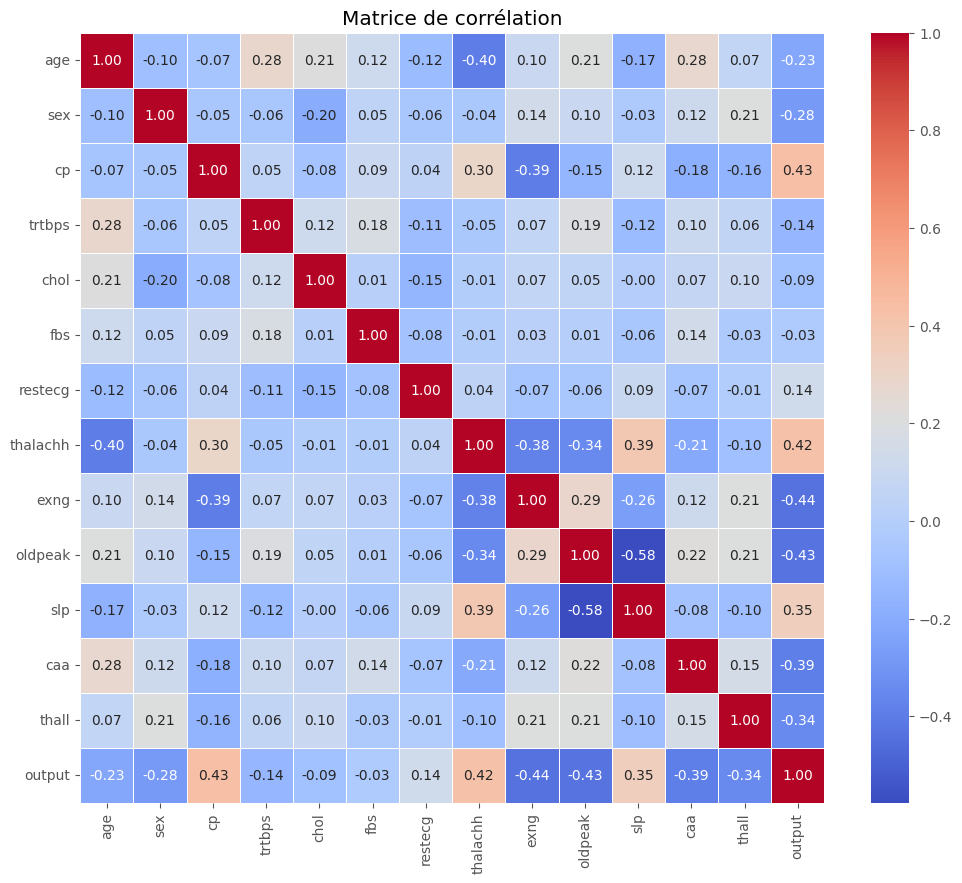

In [7]:
# Créer une instance de la classe Visualization avec votre DataFrame
visualization_instance = Visualization(df)

# Utiliser la méthode plot_correlation
visualization_instance.plot_correlation()


Apprécitiation de la valeur absolue du coefficient de corrélation r : 
0.0 à 0.2 : Très faible
0.2 à 0.4 : Faible
0.4 à 0.6 : Modérée
0.6 à 0.8 : Forte
0.8 à 1.0 : Très forte

En suivant cette mesure d'appréciation des corrélation par paires de variables, on peut dire que : 
* la variable **thalachh** est négativement modérémment corrélés avec la variable **age** (-0.40);
* **oldpeak** est  négativement modérémment corrélés avec la variable **slp** (-0.58).

Par ailleurs on note que toutes les variables sont au moins faiblement corrélées (|r|>0.20) à la variable cible **output** sauf les variables : trtbps (-0.14), chol(-0.09), fbs (-0.03) et restecg (0.14) qui lui sont très faiblement corrélées. On devrait porter une attention particulière sur ces dernières.


### Distribution de quelques variables par rapport à la cible
On observe les distibutions de certaines variables par rapport à la cible "output"

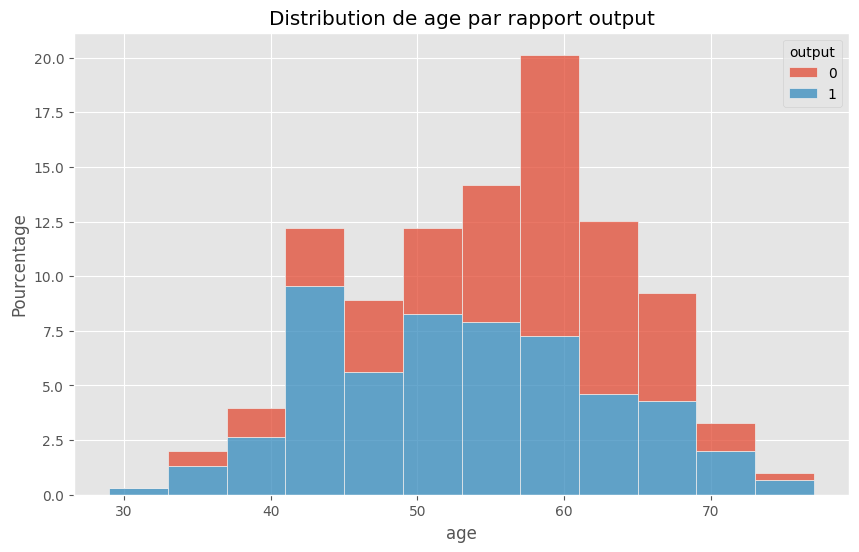

In [8]:
# Répartition de l'age par rapport au risque de maladie cardiaque (output)
visualization_instance.plot_distribution_hue(variable="age", hue="output", is_numeric=True)

Le risque de maladie cardiaque semble augmenter avec l'age.

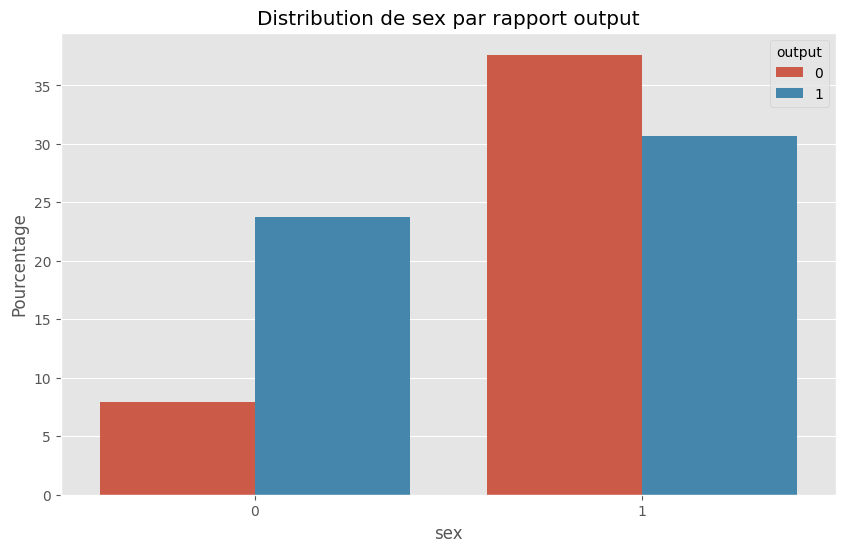

In [9]:
# Répartition du genre (homme : 1 et femme : 0) par rapport au risque de maladie cardiaque (output)
visualization_instance.plot_distribution_hue(variable="sex", hue="output", is_numeric=False)

La répartition du risque de maladie cardiaque suivant le sexe est déséquilibré chez les femmes : il y a plus de femmes avec un risque de maladie cardiaque que de femmes sans risque. 

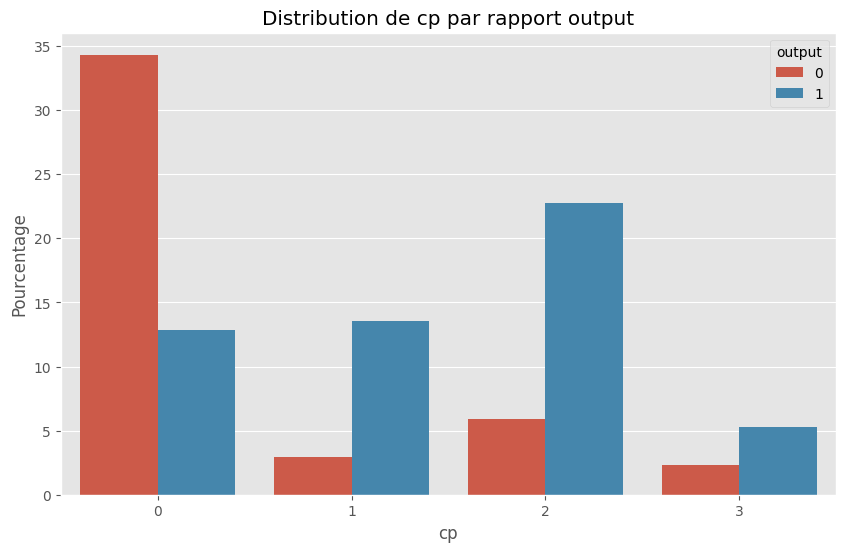

In [10]:
# Distibution du type de douleur par rapport au risque de maladie cardiaque (output)
visualization_instance.plot_distribution_hue(variable="cp", hue="output", is_numeric=False)

Les individus qui ont des douleurs thoraciques de type 1 (angine typique) semblent être peut affecté par le risque de maladie cardiaque contrairement aux autres type de douleurs thoraciques (angine atypique, douleur non angineuse, asymptomatique).

### Distribution de toutes les variables 

#### Distribution des variables numériques

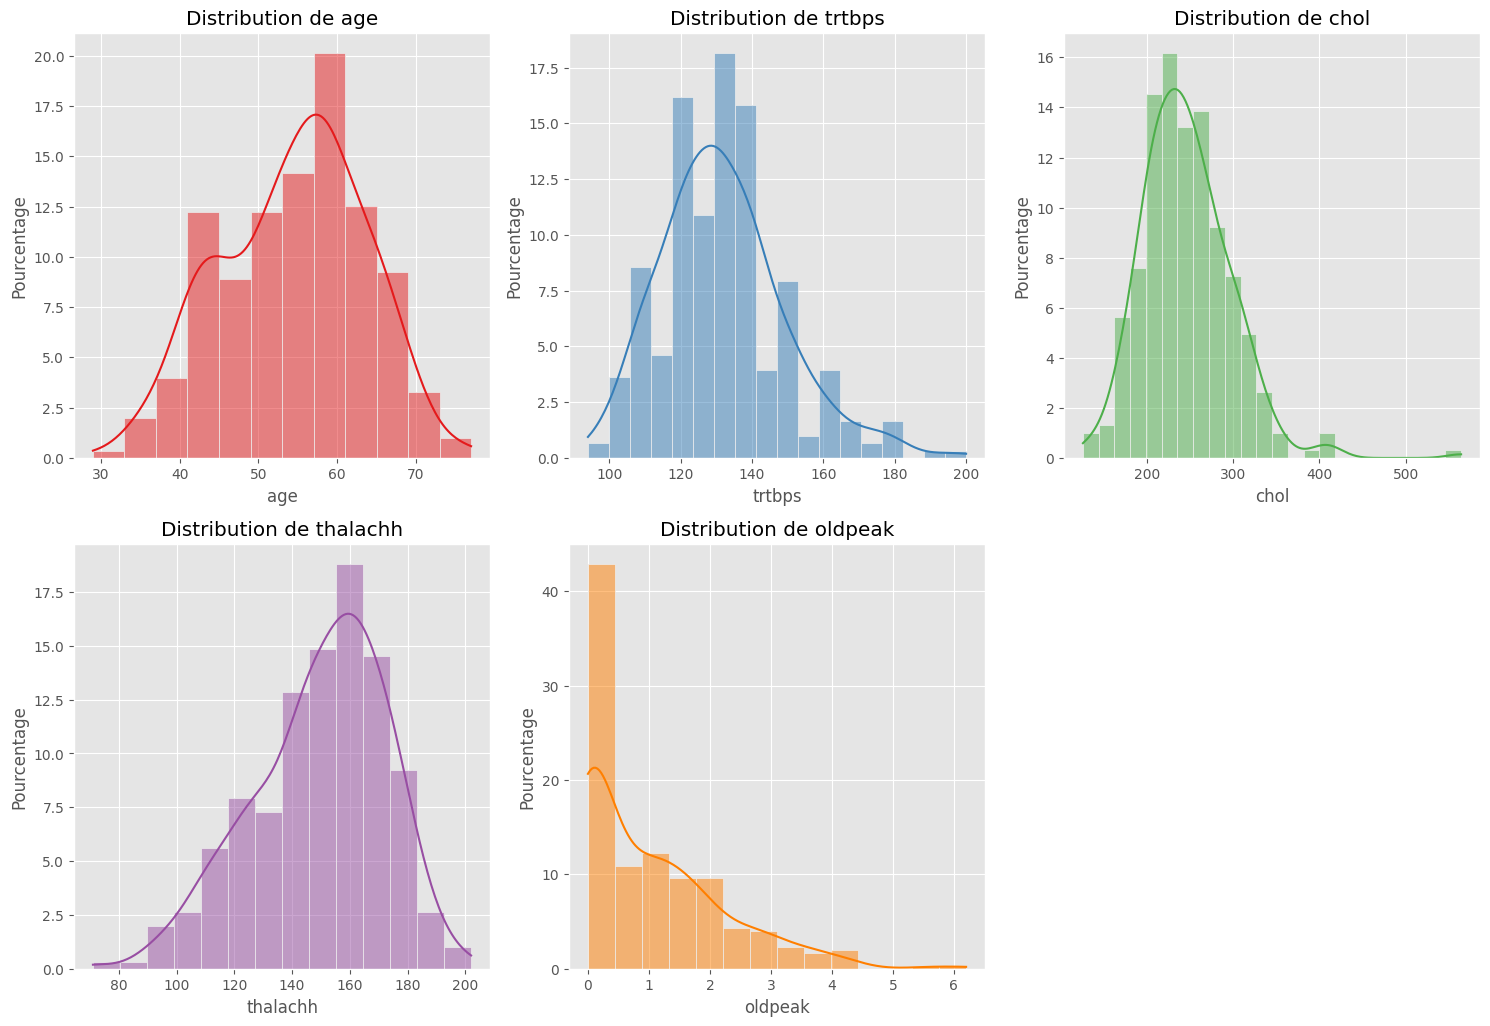

In [11]:
# Distribution des variables numériques
visualization_instance.plot_distributions(is_numeric=True, variables=[0, 3, 4, 7, 9])

#### Distribution des variables catégorielles

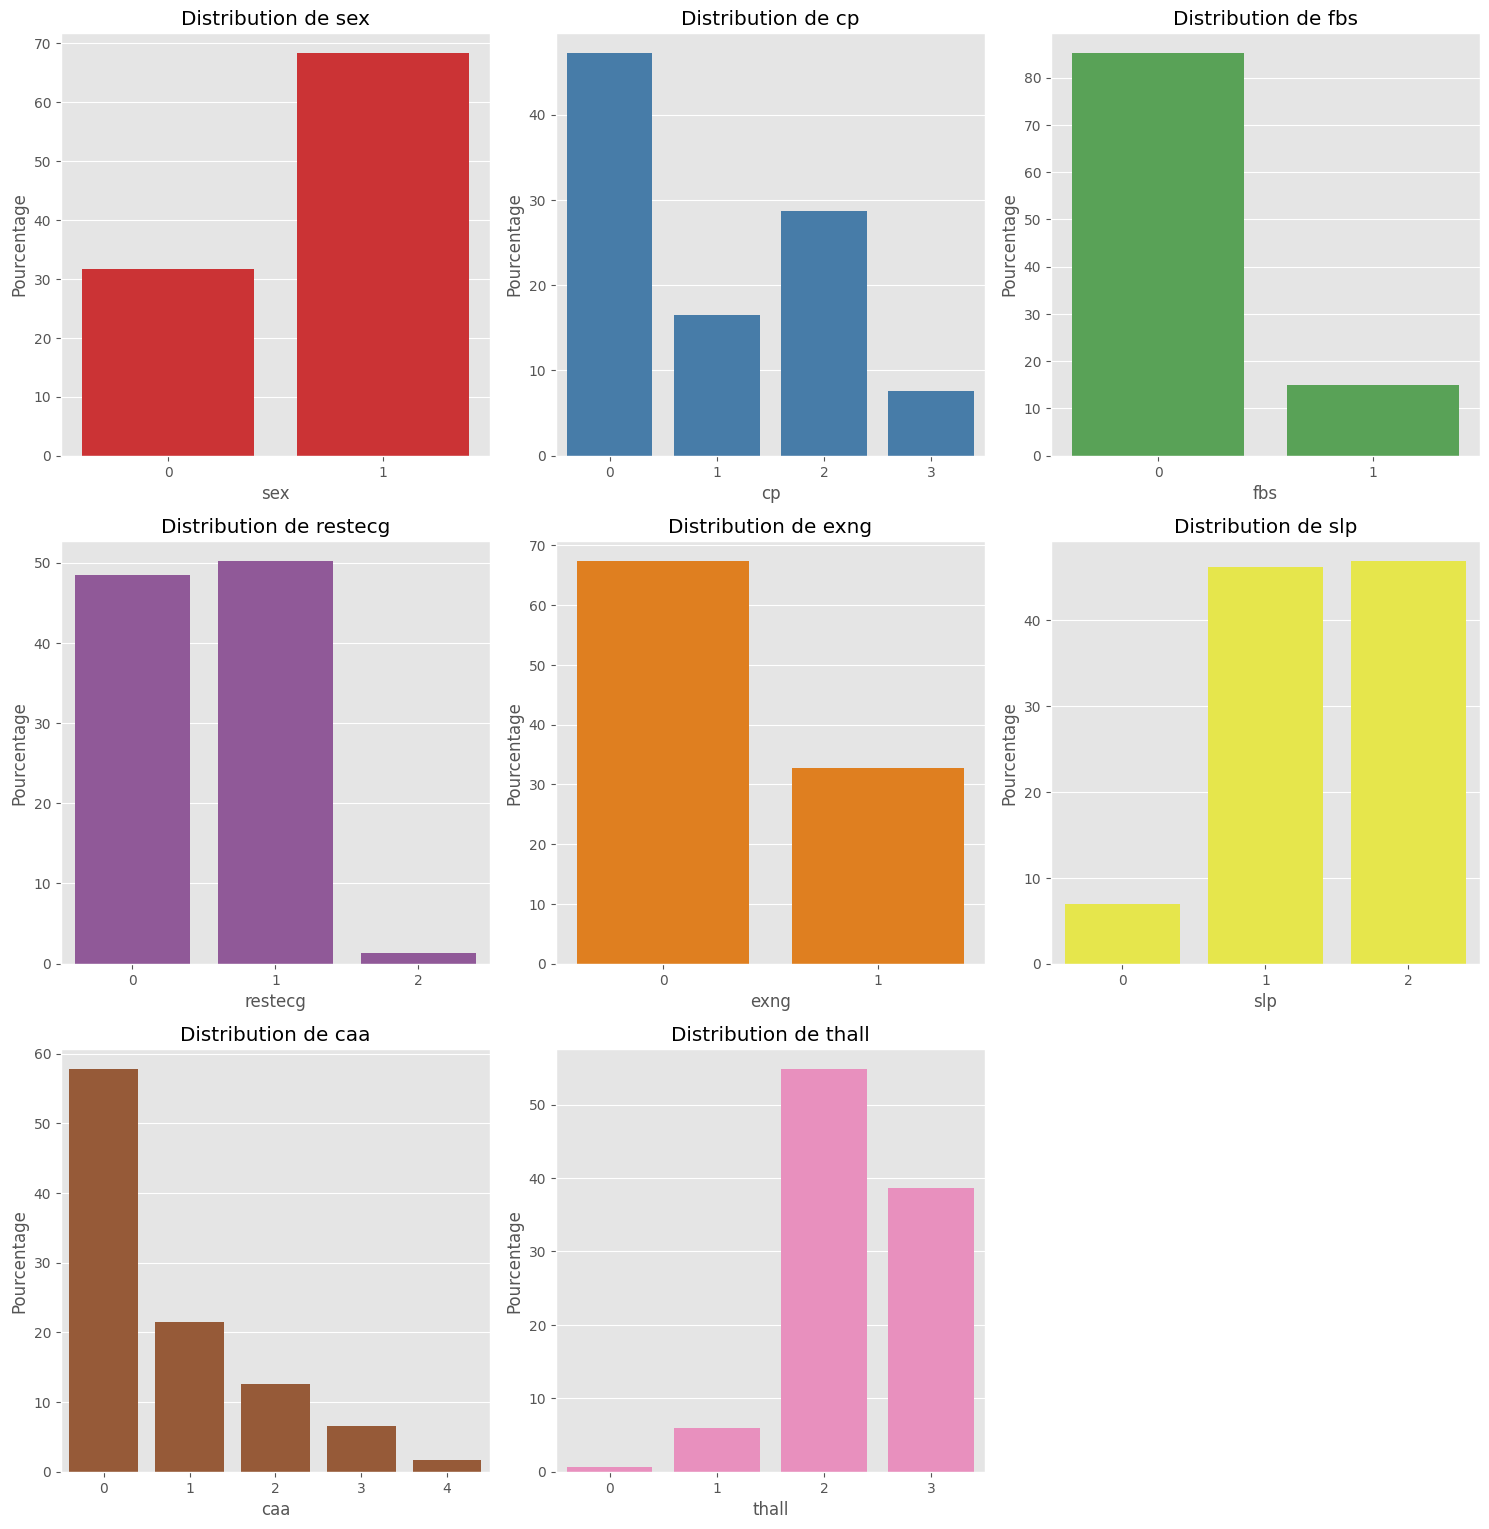

In [12]:
# Distribution des variables catégorielles
visualization_instance.plot_distributions(is_numeric=False, variables=[1, 2, 5, 6, 8, 10, 11, 12])

### Boite à moustache (Boxplot)
Aide à voir les valeurs statistiques comme la moyenne, les quartiles, et surtout les valeurs abérrantes pour les variables numériques

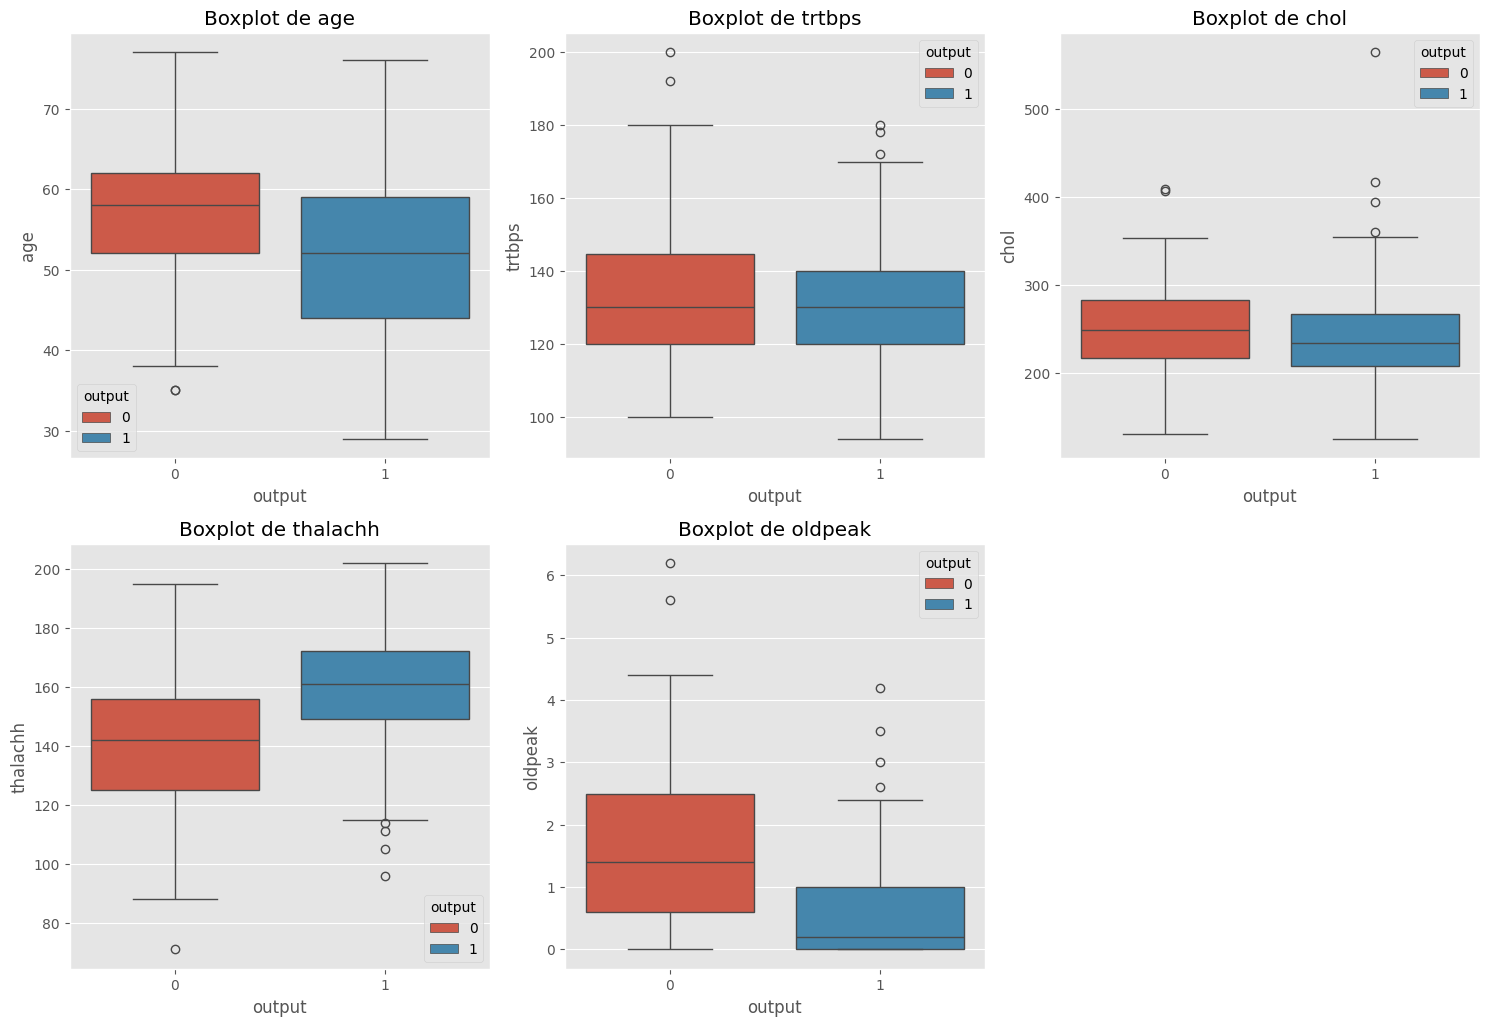

In [15]:
visualization_instance.plot_boxplot(variables=[0, 3, 4, 7, 9], y="output")

# Préparation des données

* Mise à l'échelle des variables

* Gestion des variables catégorielles

### Mise à l'échelle des variables

In [ ]:
# Utiliser DataProcessor > andle_missing_values()

### Gestion des variables catégorielles

In [ ]:
# Utiliser DataProcessor > handle_categorical_variables()

# Entrainer les données sur les 6 algorithmes
* Algorithmes choisis : 
    - Random Forest Classifier,
    - AdaBoost Classifier, 
    - Logistic Regression, 
    - MLP Classifier
    - SVM
    - Linear Discriminant Analysis
* Séparer les données en esembles de d'entraienement, de validation et de test.
* Faire la validation croisée stratifiée. 
* Implémenter la recherche d'hyperparamètres
* Visualiser les courbes d'apprentissage et de validation

### Séparer le jeu de données en trois parties: l'ensemble **d'entraînement**, de **validation** et de **test** (_train_, _val_ et _test_)

### Rechercher de meilleurs hyperparamètres


# Vérifier la généralisation sur l'ensemble de test avec les meilleurs huperparamètres

# Tracer les frontières de décision (si possible)
* On pourra sélectioner 2 ou 3 variables les plus importantes pour la classification

